# NLP sobre IMDB Dataset of 50K Movie Reviews

# Importar datos

In [1]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 62% 16.0M/25.7M [00:00<00:00, 82.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 87.3MB/s]


In [2]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [3]:
!pip install nltk

### Leer datos

In [4]:
import pandas as pd
data=pd.read_csv('IMDB Dataset.csv')
data.head(9)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative


In [5]:
print(data.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [6]:
  print("Total :\n",data['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Explorando los datos

In [7]:
import numpy as np
labels=data['sentiment']
labels=np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Asegúrate de tener las stop words en inglés
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
df = pd.DataFrame(data)

# Función para eliminar stop words
def remove_stopwords(review2):
    tokens = word_tokenize(review2)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Aplicar la función al dataframe
data['review'] = data['review'].apply(remove_stopwords)
data.head(9)

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production . < br / > < br / ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically 's family little boy ( Jake ) thinks...,negative
4,Petter Mattei 's `` Love Time Money '' visuall...,positive
5,"Probably all-time favorite movie , story selfl...",positive
6,sure would like see resurrection dated Seahunt...,positive
7,"show amazing , fresh & innovative idea 70 's f...",negative
8,Encouraged positive comments film looking forw...,negative


### Eliminar etiquetas html contenidas


In [10]:
from bs4 import BeautifulSoup
import re
df = pd.DataFrame(data)

# Función para eliminar etiquetas HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    # Eliminar cualquier etiqueta HTML residual
    cleaned_text = re.sub('<.*?>', '', cleaned_text)
    return cleaned_text

# Aplicar la función al dataframe
data['review'] = df['review'].apply(remove_html_tags)
data.head(9)

<ipython-input-10-5fc082968dbc>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production . filming techni...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically 's family little boy ( Jake ) thinks...,negative
4,Petter Mattei 's `` Love Time Money '' visuall...,positive
5,"Probably all-time favorite movie , story selfl...",positive
6,sure would like see resurrection dated Seahunt...,positive
7,"show amazing , fresh & innovative idea 70 's f...",negative
8,Encouraged positive comments film looking forw...,negative


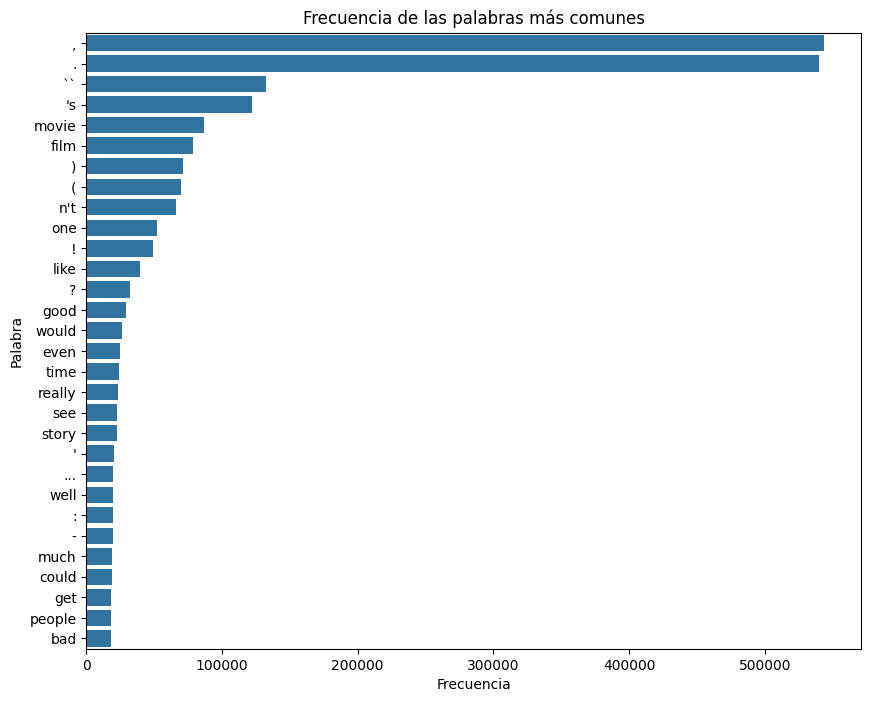

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenar todas las palabras en una lista
all_words = [word.lower() for text in data['review'] for word in nltk.word_tokenize(text)]

# Conteo de frecuencia de cada palabra
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
most_common_words = word_freq.most_common(30)

# Gráfico de barras para mostrar la frecuencia de cada palabra
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 8))
sns.barplot(y=list(words), x=list(counts), orient='h')
plt.title('Frecuencia de las palabras más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

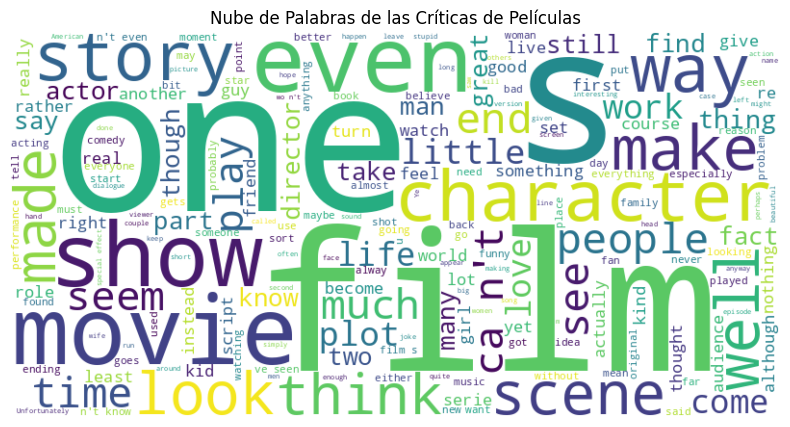

In [13]:
from wordcloud import WordCloud
# Unir todas las frases en un solo texto
text = " ".join([t for t in data['review']])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Críticas de Películas')
plt.show()

In [14]:
review=[]
sentences=list(data['review'])
for i in sentences:
  review.append(i)

### Split dataset

In [15]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

### Tokenización y generación de secuencias

In [16]:
vocab_size=1000
max_length=120
embedding_dim=16
trunc_type='post'
oov_tok="<OOV>"

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(test_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

# Modelo
### Modelo de red

In [18]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compilación del modelo

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6974 - loss: 0.5352 - val_accuracy: 0.8280 - val_loss: 0.3783
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8590 - loss: 0.3261 - val_accuracy: 0.8268 - val_loss: 0.3808
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8935 - loss: 0.2600 - val_accuracy: 0.8208 - val_loss: 0.4199
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9294 - loss: 0.1833 - val_accuracy: 0.8056 - val_loss: 0.5008
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9575 - loss: 0.1238 - val_accuracy: 0.8012 - val_loss: 0.6151
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9731 - loss: 0.0824 - val_accuracy: 0.7981 - val_loss: 0.7751
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9836 - loss: 0.0530 - val_accuracy: 0.7947 - val_loss: 0.9102
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9903 - loss: 0.0353

<Axes: >

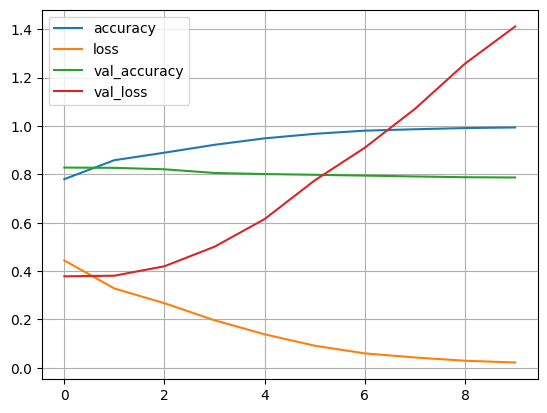

In [20]:
history=model.fit(padded, train_labels, epochs=10, validation_data=(testing_padded, test_labels))
pd.DataFrame(history.history).plot(grid=True)

# Evaluación del modelo

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predicted_labels=model.predict(testing_padded)
true_labels = test_labels
predicted_labels = (predicted_labels > 0.5).astype(int)
accuracy=accuracy_score(true_labels,predicted_labels)
precision=precision_score(true_labels, predicted_labels, average='weighted')
recall=recall_score(true_labels,predicted_labels, average='weighted')
f1=f1_score(true_labels,predicted_labels, average='weighted')

results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Modelo': ['NN']  # Puedes cambiar el nombre del modelo si estás usando otro modelo
}

results_df = pd.DataFrame(results)

print(results_df)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Accuracy  Precision  Recall  F1 Score Modelo
0     0.787   0.787139   0.787  0.786994     NN
Accuracy: 0.787
Precision: 0.7871394996669671
Recall: 0.787
F1 score: 0.786994155234177


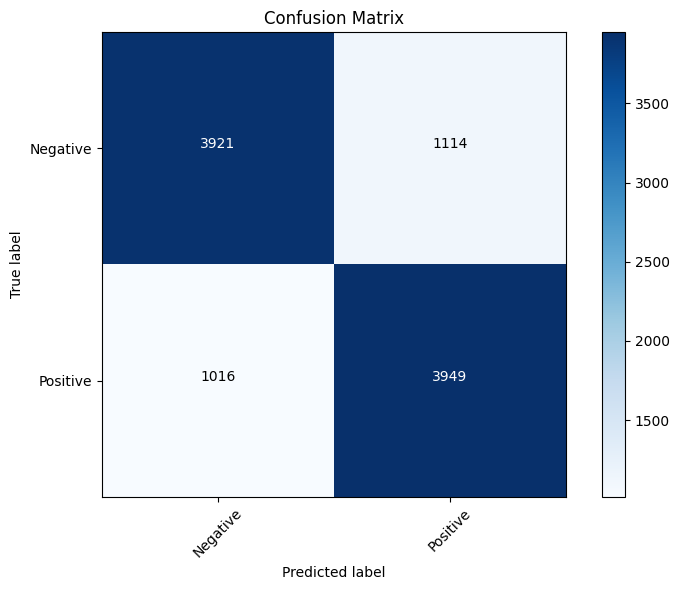

In [22]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["Negative", "Positive"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


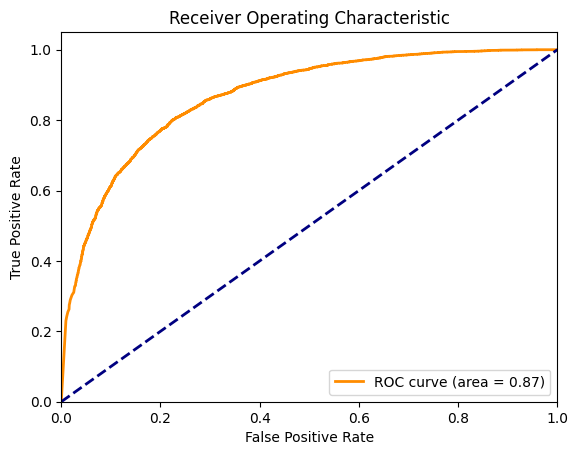

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# ROC Curve and AUC (Assuming binary classification for simplicity)
# If you have multi-class, you'll need to adapt this part
y_pred_proba = model.predict(testing_padded)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [24]:
# prompt: dame más frases de ejemplo para el modelo

# Frases de ejemplo
new_sentences = [
    "This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.",
    "I loved this film! It was so moving and the characters were so well-developed.",
    "The special effects were amazing, but the story was a bit lacking.",
    "I couldn't even finish watching this movie, it was so boring.",
    "A masterpiece of cinema, a must-watch for everyone."
]

# Tokenizar y rellenar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# Predecir el sentimiento de las nuevas frases
predictions = model.predict(new_padded)

# Imprimir los resultados
for i, prediction in enumerate(predictions):
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Frase: {new_sentences[i]}")
    print(f"Sentimiento predicho: {sentiment} ({prediction[0]:.2f})")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Frase: This movie was absolutely terrible, the acting was wooden and the plot was nonsensical.
Sentimiento predicho: Negative (0.00)

Frase: I loved this film! It was so moving and the characters were so well-developed.
Sentimiento predicho: Positive (0.99)

Frase: The special effects were amazing, but the story was a bit lacking.
Sentimiento predicho: Positive (1.00)

Frase: I couldn't even finish watching this movie, it was so boring.
Sentimiento predicho: Negative (0.04)

Frase: A masterpiece of cinema, a must-watch for everyone.
Sentimiento predicho: Positive (1.00)



[0 1 1 ... 0 1 0]


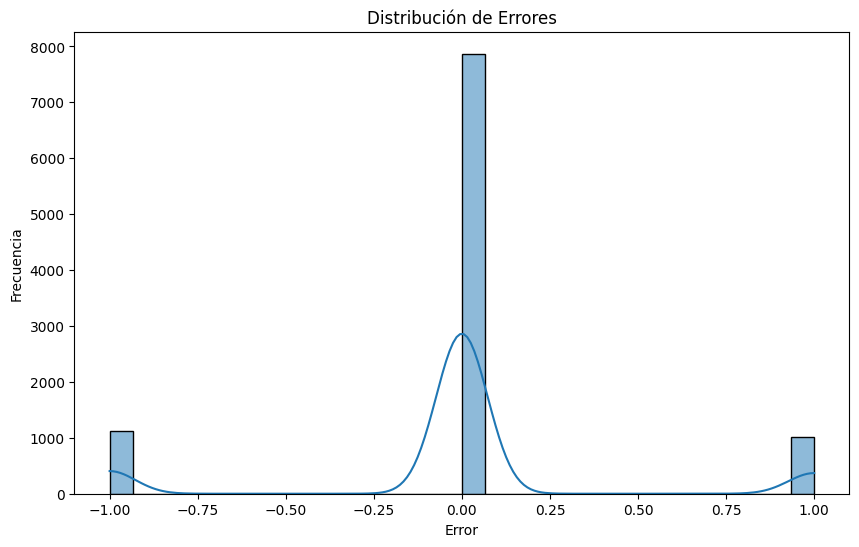

Accuracy: 0.7870


In [25]:
# Calcular errores
predicted_labels = predicted_labels.flatten()
print(predicted_labels)
y_test = test_labels #[1 if x == 'positive' else 0 for x in test_labels]
y_pred = predicted_labels #[1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Preguntas
### 1. ¿Qué hace el código en general?
### R./ El código en general es un clasificador de sentimientos a partir de reviews de películas.
###2. ¿Cuál es el propósito de cada parte del código?
### R./ El código inicia descargando el dataset desde Kaggle y descomprimiendo este, se ejecuta una limpieza de stopwords y etiquetas html para evitar que entrene el modelo de forma incorrecta, se entrena un modelo RNN para la clasificación de sentimientos para las reviews que contiene el dataset. Finalmente se muestran las métricas para ver los resultados del modelo y hacer la evaluación del mismo.
###3. ¿Por qué se utilizan los parámetros especícos en cada función (por ejemplo,num_words, embedding_dim, input_length, loss, optimizer, etc.)?
### R./ Estos parámetros van a definir la arquitectura del modelo y como se comportará en su proceso de entrenamiento:
###**num_words**
**Descripción:** Especifica el número máximo de palabras a considerar en el vocabulario del modelo.

**Importancia:** Limitar el vocabulario ayuda a manejar la complejidad y la memoria, especialmente cuando se trabaja con grandes corpus de texto. Este parámetro se utiliza para asegurarse de que solo las palabras más frecuentes se incluyan en el vocabulario del modelo.

### **embedding_dim**
**Descripción:** Define la dimensión del vector de incrustación para cada palabra.

**Importancia:** Las incrustaciones de palabras (word embeddings) son representaciones vectoriales densas de palabras en un espacio de alta dimensión. La dimensión de estas incrustaciones determina la cantidad de información que pueden capturar. Dimensiones más altas pueden capturar más matices pero requieren más recursos computacionales.
### **input_length**
**Descripción:** Especifica la longitud máxima de las secuencias de entrada que el modelo aceptará.

**Importancia:** Establecer una longitud fija de entrada es crucial para procesar las secuencias de manera eficiente en lotes (batches). Las secuencias más cortas se rellenan (padding) y las más largas se truncan para cumplir con esta longitud fija.
###**loss**
**Descripción:** Especifica la función de pérdida que se utilizará durante el entrenamiento.

**Importancia:** La función de pérdida cuantifica la diferencia entre las predicciones del modelo y los valores reales. Minimizar esta pérdida durante el entrenamiento guía al modelo a mejorar su rendimiento. Diferentes tareas (clasificación, regresión, etc.) requieren diferentes funciones de pérdida (e.g., categorical_crossentropy, mean_squared_error).
###**optimizer**
**Descripción:** Define el algoritmo que se utilizará para actualizar los pesos del modelo durante el entrenamiento.

**Importancia:** Los optimizadores controlan la manera en que el modelo ajusta sus pesos para minimizar la pérdida. Diferentes optimizadores (e.g., SGD, Adam, RMSprop) tienen diferentes características y pueden influir significativamente en la velocidad y la estabilidad del entrenamiento.
###4. ¿Cuál es la diferencia entre train_sentences y test_sentences?
### R./ train_sentences es un subdataset que se usa para el entramiento del modelo y es de mayor dimensión que el subdataset test_sentences que sirve para evaluar el comportamiento del modelo durante el entrenamiento y posterior a este.
###5. ¿Qué signican vocab_size, max_length, embedding_dim y oov_tok?
### R./**vocab_size**
**Descripción:** El tamaño del vocabulario que el modelo considerará.

**Importancia:** vocab_size limita el número de palabras únicas que se mantendrán en el vocabulario del modelo. Las palabras más frecuentes se mantienen y las menos frecuentes se descartan. Esto ayuda a reducir la complejidad del modelo y el uso de memoria.
###max_length
**Descripción:** La longitud máxima de las secuencias de entrada que el modelo aceptará.

**Importancia:** max_length establece una longitud fija para todas las secuencias de entrada. Las secuencias más cortas se rellenan (padding) y las más largas se truncan para cumplir con esta longitud fija. Esto es crucial para procesar secuencias de manera eficiente en lotes (batches) durante el entrenamiento.
###**embedding_dim
**Descripción:** La dimensión de los vectores de incrustación (embeddings) para cada palabra.

**Importancia:** Las incrustaciones de palabras (word embeddings) son representaciones vectoriales densas de palabras en un espacio de alta dimensión. La dimensión de estas incrustaciones determina la cantidad de información que pueden capturar. Dimensiones más altas pueden capturar más matices del significado de las palabras pero requieren más recursos computacionales.
###**oov_tok (Out-Of-Vocabulary Token)**
**Descripción:** Un token especial para palabras fuera del vocabulario (Out-Of-Vocabulary, OOV).

**Importancia:** oov_tok se utiliza para representar cualquier palabra que no esté en el vocabulario del modelo. Esto es útil para manejar palabras nuevas o raras que no se encontraron durante el entrenamiento.
###6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?
### R./**Capa Embedding**
**Descripción:** La capa Embedding convierte las secuencias de enteros (índices de palabras) en matrices de vectores densos (incrustaciones) de dimensión fija.

**Función:** Esta capa aprende una representación densa y continua para cada palabra en el vocabulario durante el entrenamiento. Cada palabra se representa como un vector de alta dimensión en el que se capturan relaciones semánticas.

**Importancia:** Las incrustaciones de palabras son cruciales para representar palabras de manera que el modelo pueda aprender similitudes y relaciones entre ellas. Las representaciones densas son más eficientes y expresivas en comparación con las representaciones dispersas (one-hot encoding).
### **Capa Flatten**
**Descripción:** La capa Flatten convierte una matriz multidimensional en un vector unidimensional.

**Función:** Después de la capa Embedding, los datos tienen la forma de una matriz tridimensional (batch_size, input_length, embedding_dim). Flatten aplana esta matriz para que se pueda alimentar a una capa densa (fully connected).

**Importancia:** La capa Flatten es esencial para conectar las representaciones de incrustación con las capas densas que siguen en la red.
### **Capa Dense**
**Descripción:** La capa Dense es una capa completamente conectada donde cada neurona está conectada a todas las neuronas de la capa anterior.

**Función:** Realiza la transformación afín seguida de una función de activación no lineal. Es utilizada para aprender características complejas y tomar decisiones basadas en las entradas transformadas.

**Importancia:** Las capas densas son fundamentales para aprender combinaciones de características y realizar la clasificación o regresión al final del modelo.
### **Capa Sigmoid**
**Descripción:** La función de activación sigmoid comprime la salida de la neurona a un rango entre 0 y 1.

**Función:** Transforma la salida de la capa densa en probabilidades. Es especialmente útil para tareas de clasificación binaria donde se necesita una probabilidad de pertenencia a una clase.

**Importancia:** La función sigmoid es ideal para la salida de una red neuronal en problemas de clasificación binaria, ya que convierte la salida en una probabilidad, facilitando la interpretación y la evaluación.
###7. ¿Qué representan las métricas de pérdida y precisión en el modelo?
**Pérdida:** Mide el error del modelo; es la diferencia entre las predicciones y los valores reales.

**Precisión:** Indica la proporción de predicciones correctas sobre el total de predicciones realizadas.
###8. ¿Qué pasa durante el entrenamiento del modelo?
El modelo ajusta sus pesos mediante la retropropagación para minimizar la pérdida, mejorando así su capacidad para hacer predicciones precisas.
###9. ¿Qué significan las épocas y cómo afectan al proceso de entrenamiento?
**Épocas:** Número de veces que el modelo pasa por todo el conjunto de datos de entrenamiento.
Más épocas permiten un aprendizaje más profundo, pero demasiadas pueden llevar al sobreajuste.
###10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?
Garantiza que el modelo generaliza bien a datos no vistos, ayudando a detectar el sobreajuste y evaluar el rendimiento real del modelo.
###11. ¿Cuál es el objetivo final del código?
Entrenar un modelo de aprendizaje profundo para realizar tareas específicas (e.g., clasificación de texto) con un rendimiento óptimo y validado adecuadamente.